In [1]:
from keras_retinanet.utils.image import preprocess_image
from keras_retinanet.utils.image import read_image_bgr
from keras_retinanet.utils.image import resize_image
from keras_retinanet.utils.visualization import draw_box, draw_caption
from keras_retinanet.utils.colors import label_color
#import config
from keras_retinanet import models
from imutils import paths
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image  
import PIL  
import matplotlib.image as mpimg
from matplotlib.backends.backend_pdf import PdfPages
import os
import argparse
from fpdf import FPDF

%matplotlib inline

In [2]:
user_dir = '/home/user1/rohit/'
base_dir = '/home/user1/rohit/aiskyeye_dataset/'
val_base_dir = os.path.join(base_dir, 'VisDrone2019-DET-val')
val_images = os.path.join(val_base_dir, 'images')
val_annotations = os.path.join(user_dir, 'annotations_val.csv')
class_mapping = os.path.join(user_dir, 'class_mapping.csv')

In [3]:
val_images_list = sorted(os.listdir(val_images))

In [4]:
num_val_images = len(val_images_list)

In [5]:
print(f"No. of val images: {num_val_images}")

No. of val images: 548


In [6]:
LABELS = open(class_mapping).read().strip().split('\n')
LABELS = {L.split(",")[0]: int(L.split(",")[1]) for L in LABELS}
print(LABELS)

{'pedestrian': 0, 'people': 1, 'bicycle': 2, 'car': 3, 'van': 4, 'truck': 5, 'tricycle': 6, 'awning-tricycle': 7, 'bus': 8, 'motor': 9}


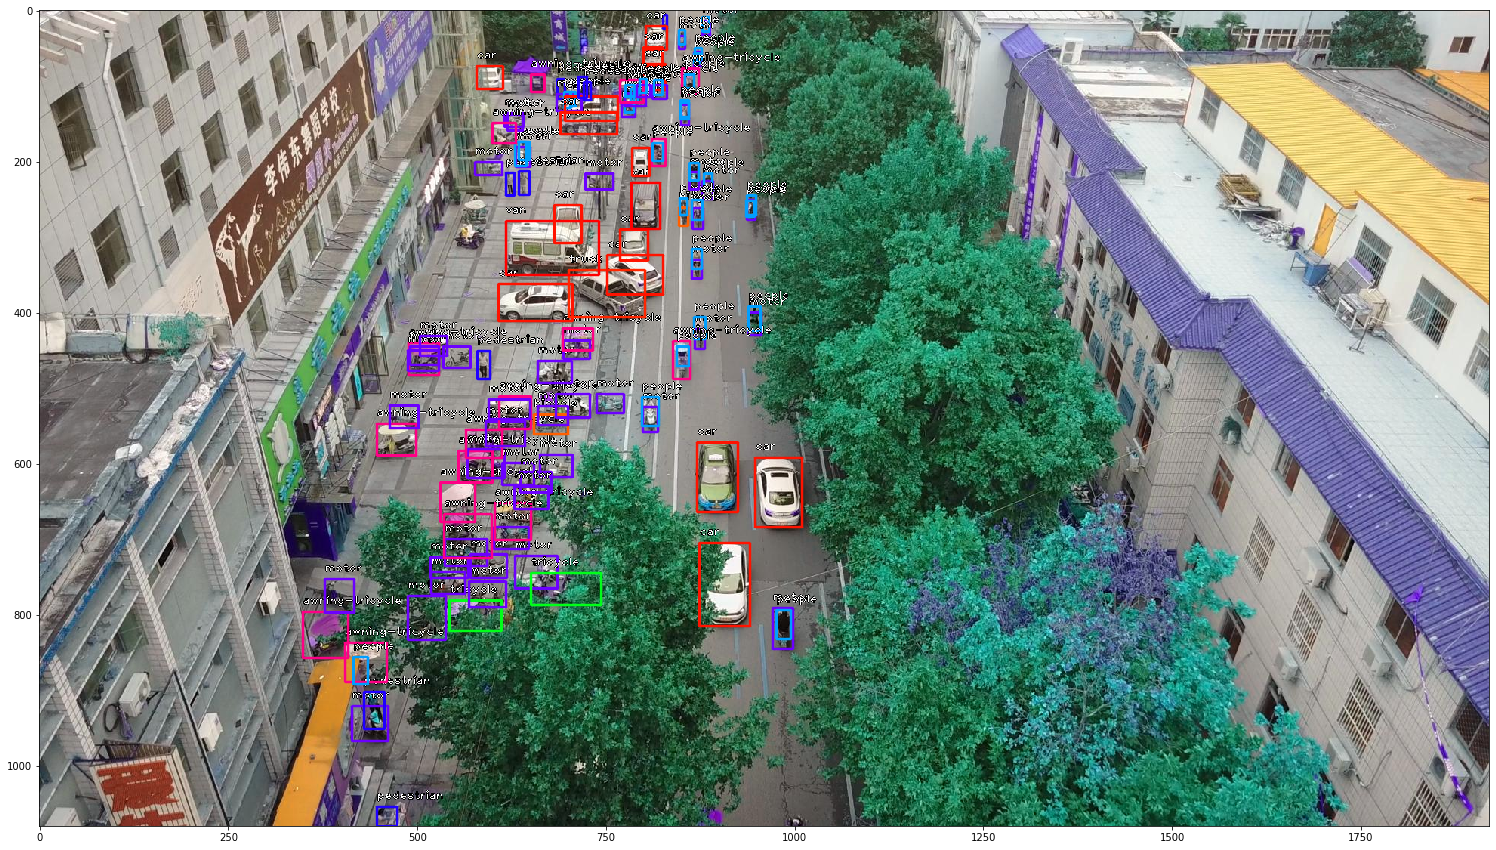

In [7]:
plt.figure(figsize=(30,15))
ann = open(val_annotations, "r")
i=0
lines = ann.readlines()
for i in range(len(lines)):
    box=lines[i].strip().split(',')
    img = cv2.imread(box[0])
    while(lines[i].strip().split(',')[0] == box[0]):
        next_box = lines[i].strip().split(',')
        draw_box(img, next_box[1:5], label_color(LABELS[next_box[-1]]))
        draw_caption(img, np.array(next_box[1:5], dtype='int32'), next_box[-1])
        i+=1
    plt.imshow(img)
    break;   
        
#print("done")
ann.close()



Using TensorFlow backend.


tracking <tf.Variable 'Variable:0' shape=(9, 4) dtype=float32, numpy=
array([[-22.627417, -11.313708,  22.627417,  11.313708],
       [-28.50876 , -14.25438 ,  28.50876 ,  14.25438 ],
       [-35.918785, -17.959393,  35.918785,  17.959393],
       [-16.      , -16.      ,  16.      ,  16.      ],
       [-20.158737, -20.158737,  20.158737,  20.158737],
       [-25.398417, -25.398417,  25.398417,  25.398417],
       [-11.313708, -22.627417,  11.313708,  22.627417],
       [-14.25438 , -28.50876 ,  14.25438 ,  28.50876 ],
       [-17.959393, -35.918785,  17.959393,  35.918785]], dtype=float32)> anchors
tracking <tf.Variable 'Variable:0' shape=(9, 4) dtype=float32, numpy=
array([[-45.254833, -22.627417,  45.254833,  22.627417],
       [-57.01752 , -28.50876 ,  57.01752 ,  28.50876 ],
       [-71.83757 , -35.918785,  71.83757 ,  35.918785],
       [-32.      , -32.      ,  32.      ,  32.      ],
       [-40.317474, -40.317474,  40.317474,  40.317474],
       [-50.796833, -50.796833,  50.7

/home/user1/.conda/envs/rohit_venv_2/lib/python3.7/site-packages/keras/engine/saving.py:341: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


['/home/user1/rohit/aiskyeye_dataset/VisDrone2019-DET-val/images/0000103_04513_d_0000034.jpg', '/home/user1/rohit/aiskyeye_dataset/VisDrone2019-DET-val/images/0000283_01001_d_0000679.jpg', '/home/user1/rohit/aiskyeye_dataset/VisDrone2019-DET-val/images/0000330_01801_d_0000809.jpg', '/home/user1/rohit/aiskyeye_dataset/VisDrone2019-DET-val/images/0000271_06801_d_0000406.jpg', '/home/user1/rohit/aiskyeye_dataset/VisDrone2019-DET-val/images/0000256_00715_d_0000019.jpg']
[INFO] predicting on image 1 of /home/user1/rohit/aiskyeye_dataset/VisDrone2019-DET-val/images/0000103_04513_d_0000034.jpg


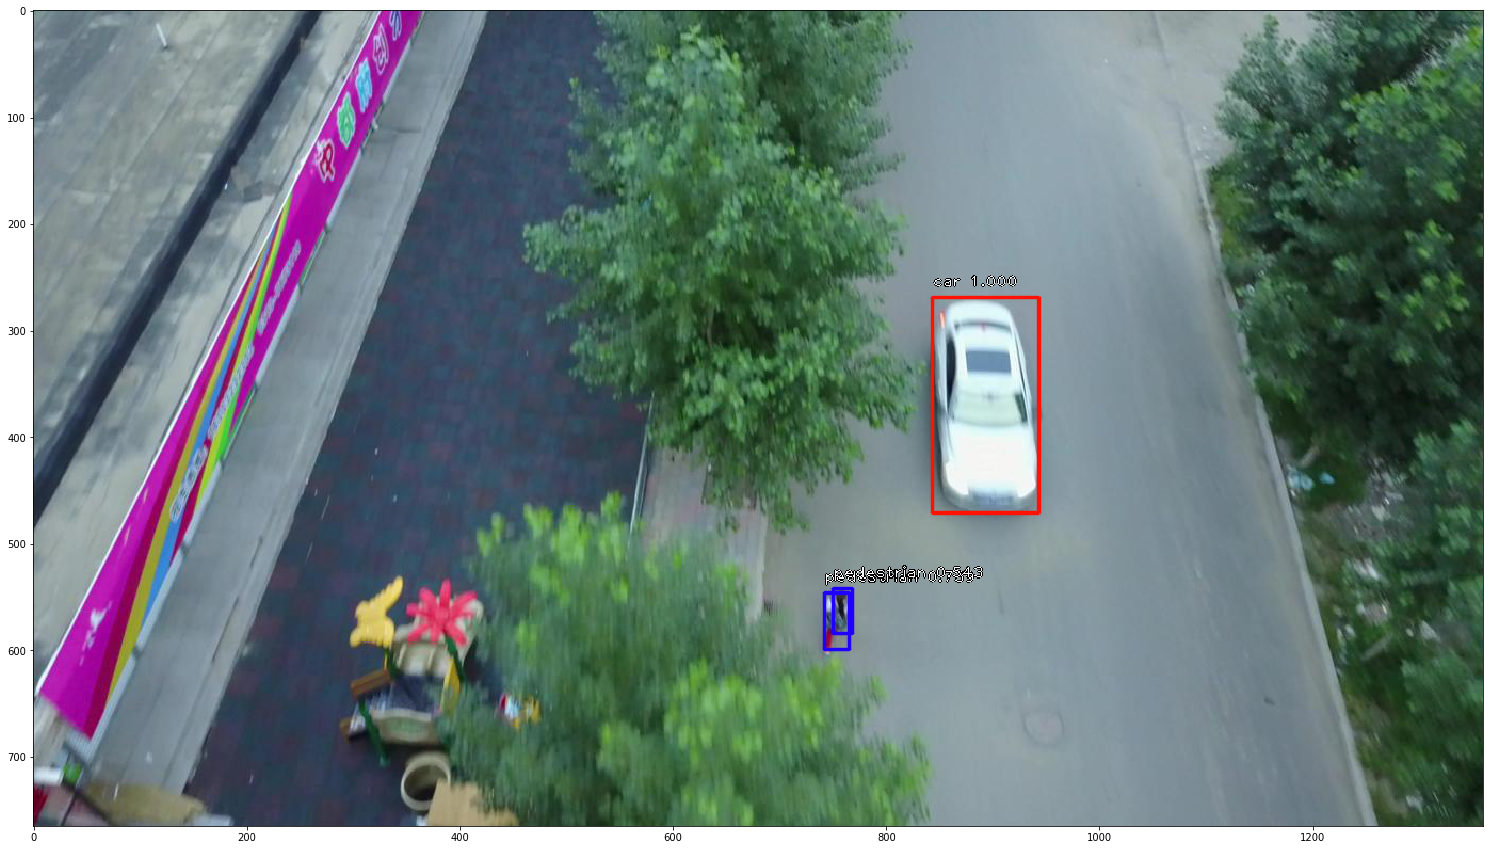

In [8]:
plt.figure(figsize=(30,15))
model = './model_30.h5'
labels = './class_mapping.csv'
inputs = val_images
confidence = 0.5

LABELS = open(labels).read().strip().split('\n')
LABELS = {int(L.split(",")[1]): L.split(",")[0] for L in LABELS}

model = models.load_model(model, backbone_name='resnet50')
imagePaths = list(paths.list_images(inputs))
print(imagePaths[:5])
for (i, imagePath) in enumerate(imagePaths):

    print("[INFO] predicting on image {} of {}".format(i+1, imagePath))
    filename = (imagePath.split(os.path.sep)[-1]).split('.')[0]
    
    image = read_image_bgr(imagePath)
 
    draw = image.copy()
    draw = cv2.cvtColor(draw, cv2.COLOR_BGR2RGB)

    image = preprocess_image(image)
    (image, scale) = resize_image(image)
        
    image = np.expand_dims(image, axis=0)

    (boxes, scores, labels) = model.predict_on_batch(image)
    boxes /= scale

    for (box, score, label) in zip(boxes[0], scores[0], labels[0]):

        if score < confidence:
            continue
        
        color = label_color(label)
        b = box.astype(int)
        draw_box(draw, b, color=color)
     
        caption = "{} {:.3f}".format(LABELS[label], score)
        draw_caption(draw, b, caption)
    draw = Image.fromarray(draw)
    plt.imshow(draw)
    break


In [9]:
# COMBINED GROUND TRUTH AND PREDICTED BOUNDING BOX GENERATOR


plt.figure(figsize=(30,15))

model = './model_30.h5'
class_labels = './class_mapping.csv'
inputs = val_images
confidence = 0.5

ann = open(val_annotations, "r")
i=0
lines = ann.readlines()

model = models.load_model(model, backbone_name='resnet50')

LABELS_orig = open(class_mapping).read().strip().split('\n')
LABELS = {L.split(",")[0]: int(L.split(",")[1]) for L in LABELS_orig}
LABELS_REV = {int(L.split(",")[1]): L.split(",")[0] for L in LABELS_orig}

count_imgs = 0

while i < len(lines):
    count_imgs +=1
    pdf = FPDF(orientation = 'L', unit = 'mm', format = (450, 700))
    pdf.compress = False
    pdf.add_page()

    box=lines[i].strip().split(',')
    img = cv2.imread(box[0])
    filename = (box[0].split(os.path.sep)[-1]).split('.')[0]
    while(lines[i].strip().split(',')[0] == box[0]):
        next_box = lines[i].strip().split(',')
        draw_box(img, next_box[1:5], label_color(LABELS[next_box[-1]]))
        draw_caption(img, np.array(next_box[1:5], dtype='int32'), next_box[-1])
        i+=1 
    
    draw = Image.fromarray(img)
    draw.save("ground_truth_images/{}.jpg".format(filename))

    print("[INFO] predicting on image {}".format(box[0]))
    
    image = read_image_bgr(box[0])
 
    draw = image.copy()
    draw = cv2.cvtColor(draw, cv2.COLOR_BGR2RGB)

    image = preprocess_image(image)
    (image, scale) = resize_image(image)
        
    image = np.expand_dims(image, axis=0)

    (boxes, scores, labels) = model.predict_on_batch(image)
    boxes /= scale

    for (box, score, label) in zip(boxes[0], scores[0], labels[0]):

        if score < confidence:
            continue
        
        color = label_color(label)
        b = box.astype(int)
        draw_box(draw, b, color=color)
     
        caption = "{} {:.3f}".format(LABELS_REV[label], score)
        draw_caption(draw, b, caption)
    draw = Image.fromarray(draw)

    draw.save("predicted_images/{}.jpg".format(filename))
    
    pdf.image("ground_truth_images/{}.jpg".format(filename))
    pdf.add_page()
    pdf.image("predicted_images/{}.jpg".format(filename))
    pdf.output("./OUTPUT_PDF/{}.pdf".format(filename), "F") 
        
#print("done")
ann.close()

tracking <tf.Variable 'Variable:0' shape=(9, 4) dtype=float32, numpy=
array([[-22.627417, -11.313708,  22.627417,  11.313708],
       [-28.50876 , -14.25438 ,  28.50876 ,  14.25438 ],
       [-35.918785, -17.959393,  35.918785,  17.959393],
       [-16.      , -16.      ,  16.      ,  16.      ],
       [-20.158737, -20.158737,  20.158737,  20.158737],
       [-25.398417, -25.398417,  25.398417,  25.398417],
       [-11.313708, -22.627417,  11.313708,  22.627417],
       [-14.25438 , -28.50876 ,  14.25438 ,  28.50876 ],
       [-17.959393, -35.918785,  17.959393,  35.918785]], dtype=float32)> anchors
tracking <tf.Variable 'Variable:0' shape=(9, 4) dtype=float32, numpy=
array([[-45.254833, -22.627417,  45.254833,  22.627417],
       [-57.01752 , -28.50876 ,  57.01752 ,  28.50876 ],
       [-71.83757 , -35.918785,  71.83757 ,  35.918785],
       [-32.      , -32.      ,  32.      ,  32.      ],
       [-40.317474, -40.317474,  40.317474,  40.317474],
       [-50.796833, -50.796833,  50.7

[INFO] predicting on image ./aiskyeye_dataset/VisDrone2019-DET-val/images/0000086_01954_d_0000005.jpg
[INFO] predicting on image ./aiskyeye_dataset/VisDrone2019-DET-val/images/0000103_00180_d_0000026.jpg
[INFO] predicting on image ./aiskyeye_dataset/VisDrone2019-DET-val/images/0000103_00502_d_0000027.jpg
[INFO] predicting on image ./aiskyeye_dataset/VisDrone2019-DET-val/images/0000103_01734_d_0000028.jpg
[INFO] predicting on image ./aiskyeye_dataset/VisDrone2019-DET-val/images/0000103_02544_d_0000029.jpg
[INFO] predicting on image ./aiskyeye_dataset/VisDrone2019-DET-val/images/0000103_02964_d_0000030.jpg
[INFO] predicting on image ./aiskyeye_dataset/VisDrone2019-DET-val/images/0000103_03349_d_0000031.jpg
[INFO] predicting on image ./aiskyeye_dataset/VisDrone2019-DET-val/images/0000103_03738_d_0000032.jpg
[INFO] predicting on image ./aiskyeye_dataset/VisDrone2019-DET-val/images/0000103_04122_d_0000033.jpg
[INFO] predicting on image ./aiskyeye_dataset/VisDrone2019-DET-val/images/0000103_

[INFO] predicting on image ./aiskyeye_dataset/VisDrone2019-DET-val/images/0000215_02319_d_0000261.jpg
[INFO] predicting on image ./aiskyeye_dataset/VisDrone2019-DET-val/images/0000215_02667_d_0000262.jpg
[INFO] predicting on image ./aiskyeye_dataset/VisDrone2019-DET-val/images/0000215_02932_d_0000263.jpg
[INFO] predicting on image ./aiskyeye_dataset/VisDrone2019-DET-val/images/0000215_03226_d_0000264.jpg
[INFO] predicting on image ./aiskyeye_dataset/VisDrone2019-DET-val/images/0000216_00520_d_0000001.jpg
[INFO] predicting on image ./aiskyeye_dataset/VisDrone2019-DET-val/images/0000220_01242_d_0000004.jpg
[INFO] predicting on image ./aiskyeye_dataset/VisDrone2019-DET-val/images/0000223_01802_d_0000005.jpg
[INFO] predicting on image ./aiskyeye_dataset/VisDrone2019-DET-val/images/0000237_00001_d_0000001.jpg
[INFO] predicting on image ./aiskyeye_dataset/VisDrone2019-DET-val/images/0000242_00001_d_0000001.jpg
[INFO] predicting on image ./aiskyeye_dataset/VisDrone2019-DET-val/images/0000242_

[INFO] predicting on image ./aiskyeye_dataset/VisDrone2019-DET-val/images/0000271_06801_d_0000406.jpg
[INFO] predicting on image ./aiskyeye_dataset/VisDrone2019-DET-val/images/0000271_07001_d_0000407.jpg
[INFO] predicting on image ./aiskyeye_dataset/VisDrone2019-DET-val/images/0000271_07201_d_0000408.jpg
[INFO] predicting on image ./aiskyeye_dataset/VisDrone2019-DET-val/images/0000271_07401_d_0000409.jpg
[INFO] predicting on image ./aiskyeye_dataset/VisDrone2019-DET-val/images/0000273_05601_d_0000466.jpg
[INFO] predicting on image ./aiskyeye_dataset/VisDrone2019-DET-val/images/0000276_00001_d_0000507.jpg
[INFO] predicting on image ./aiskyeye_dataset/VisDrone2019-DET-val/images/0000276_00401_d_0000509.jpg
[INFO] predicting on image ./aiskyeye_dataset/VisDrone2019-DET-val/images/0000276_00601_d_0000510.jpg
[INFO] predicting on image ./aiskyeye_dataset/VisDrone2019-DET-val/images/0000276_01001_d_0000512.jpg
[INFO] predicting on image ./aiskyeye_dataset/VisDrone2019-DET-val/images/0000276_

[INFO] predicting on image ./aiskyeye_dataset/VisDrone2019-DET-val/images/0000287_01801_d_0000768.jpg
[INFO] predicting on image ./aiskyeye_dataset/VisDrone2019-DET-val/images/0000287_02001_d_0000769.jpg
[INFO] predicting on image ./aiskyeye_dataset/VisDrone2019-DET-val/images/0000287_02201_d_0000770.jpg
[INFO] predicting on image ./aiskyeye_dataset/VisDrone2019-DET-val/images/0000287_02401_d_0000771.jpg
[INFO] predicting on image ./aiskyeye_dataset/VisDrone2019-DET-val/images/0000287_02601_d_0000772.jpg
[INFO] predicting on image ./aiskyeye_dataset/VisDrone2019-DET-val/images/0000287_02801_d_0000773.jpg
[INFO] predicting on image ./aiskyeye_dataset/VisDrone2019-DET-val/images/0000287_03001_d_0000774.jpg
[INFO] predicting on image ./aiskyeye_dataset/VisDrone2019-DET-val/images/0000287_03401_d_0000776.jpg
[INFO] predicting on image ./aiskyeye_dataset/VisDrone2019-DET-val/images/0000287_04601_d_0000780.jpg
[INFO] predicting on image ./aiskyeye_dataset/VisDrone2019-DET-val/images/0000287_

[INFO] predicting on image ./aiskyeye_dataset/VisDrone2019-DET-val/images/0000295_02900_d_0000034.jpg
[INFO] predicting on image ./aiskyeye_dataset/VisDrone2019-DET-val/images/0000296_00601_d_0000038.jpg
[INFO] predicting on image ./aiskyeye_dataset/VisDrone2019-DET-val/images/0000296_01001_d_0000040.jpg
[INFO] predicting on image ./aiskyeye_dataset/VisDrone2019-DET-val/images/0000300_03201_d_0000154.jpg
[INFO] predicting on image ./aiskyeye_dataset/VisDrone2019-DET-val/images/0000301_00001_d_0000156.jpg
[INFO] predicting on image ./aiskyeye_dataset/VisDrone2019-DET-val/images/0000301_00201_d_0000157.jpg
[INFO] predicting on image ./aiskyeye_dataset/VisDrone2019-DET-val/images/0000301_01001_d_0000161.jpg
[INFO] predicting on image ./aiskyeye_dataset/VisDrone2019-DET-val/images/0000301_01201_d_0000162.jpg
[INFO] predicting on image ./aiskyeye_dataset/VisDrone2019-DET-val/images/0000303_03401_d_0000200.jpg
[INFO] predicting on image ./aiskyeye_dataset/VisDrone2019-DET-val/images/0000308_

[INFO] predicting on image ./aiskyeye_dataset/VisDrone2019-DET-val/images/0000333_03333_d_0000018.jpg
[INFO] predicting on image ./aiskyeye_dataset/VisDrone2019-DET-val/images/0000333_03529_d_0000019.jpg
[INFO] predicting on image ./aiskyeye_dataset/VisDrone2019-DET-val/images/0000333_03725_d_0000020.jpg
[INFO] predicting on image ./aiskyeye_dataset/VisDrone2019-DET-val/images/0000335_00001_d_0000043.jpg
[INFO] predicting on image ./aiskyeye_dataset/VisDrone2019-DET-val/images/0000335_00197_d_0000044.jpg
[INFO] predicting on image ./aiskyeye_dataset/VisDrone2019-DET-val/images/0000335_00393_d_0000045.jpg
[INFO] predicting on image ./aiskyeye_dataset/VisDrone2019-DET-val/images/0000335_00589_d_0000046.jpg
[INFO] predicting on image ./aiskyeye_dataset/VisDrone2019-DET-val/images/0000335_00785_d_0000047.jpg
[INFO] predicting on image ./aiskyeye_dataset/VisDrone2019-DET-val/images/0000335_00981_d_0000048.jpg
[INFO] predicting on image ./aiskyeye_dataset/VisDrone2019-DET-val/images/0000335_

[INFO] predicting on image ./aiskyeye_dataset/VisDrone2019-DET-val/images/0000360_06273_d_0000745.jpg
[INFO] predicting on image ./aiskyeye_dataset/VisDrone2019-DET-val/images/0000360_06665_d_0000747.jpg
[INFO] predicting on image ./aiskyeye_dataset/VisDrone2019-DET-val/images/0000360_06861_d_0000748.jpg
[INFO] predicting on image ./aiskyeye_dataset/VisDrone2019-DET-val/images/0000360_07057_d_0000749.jpg
[INFO] predicting on image ./aiskyeye_dataset/VisDrone2019-DET-val/images/0000360_07253_d_0000750.jpg
[INFO] predicting on image ./aiskyeye_dataset/VisDrone2019-DET-val/images/0000360_07645_d_0000752.jpg
[INFO] predicting on image ./aiskyeye_dataset/VisDrone2019-DET-val/images/0000364_00589_d_0000798.jpg
[INFO] predicting on image ./aiskyeye_dataset/VisDrone2019-DET-val/images/0000364_01177_d_0000799.jpg
[INFO] predicting on image ./aiskyeye_dataset/VisDrone2019-DET-val/images/0000364_01373_d_0000780.jpg
[INFO] predicting on image ./aiskyeye_dataset/VisDrone2019-DET-val/images/0000364_

IndexError: list index out of range

<Figure size 2160x1080 with 0 Axes>

In [11]:
count = len(os.listdir('./OUTPUT_PDF'))
print(count)

548
